# DA 320 Midterm Project - MongoDB Notebook

This Jupyter notebook is to read the data from MongoDB, do some transformation, and analyze the data.

In [110]:
import certifi
import pandas as pd
import json
import pymongo


CREDENTIALS_FILE = "D:\\BC fall quarter 2022\\DA320 14730 - F22 - Data Acquisition & Mngmt\\week 6\\credentials.json"
MONGO_DB_CONN_STR_KEY = "mongodb_connection_string"
DATABASE_NAME = "da320ZhanjuLi"
MIDTERM_METACRITIC_COLL_NAME = "midterm_metacritic"

with open(CREDENTIALS_FILE) as f:
    data = json.load(f)
    mongodb_connection_string = data[MONGO_DB_CONN_STR_KEY]


client = pymongo.MongoClient(mongodb_connection_string, tlsCAFile=certifi.where())
da320_database = client[DATABASE_NAME]

midterm_metacritic = da320_database[MIDTERM_METACRITIC_COLL_NAME]

metacritic_df = pd.DataFrame(midterm_metacritic.find())
print(metacritic_df.shape)

metacritic_df.release_date = pd.to_datetime(metacritic_df.release_date)
metacritic_df['year'] = metacritic_df.release_date.dt.year
metacritic_df['month'] = metacritic_df.release_date.dt.month
metacritic_df.metascore = pd.to_numeric(metacritic_df.metascore)

metacritic_df.head()


(11844, 6)


,_id,title,release_date,description,metascore,image_url,year,month
0,6369d0a3913edf4c6909932e,"Crouching Tiger, Hidden Dragon",2000-12-08,"In 19th century China, a magical sword given b...",94,https://static.metacritic.com/images/products/...,2000,12
1,6369d0a3913edf4c6909932f,Yi Yi,2000-10-06,This film portrays life through portraits of t...,93,https://static.metacritic.com/images/products/...,2000,10
2,6369d0a3913edf4c69099330,Beau Travail,2000-03-31,The soldiers of a small French Foreign Legion ...,91,https://static.metacritic.com/images/products/...,2000,3
3,6369d0a3913edf4c69099331,Almost Famous,2000-09-13,"In the 1970's, a high school boy (Fugit) is gi...",90,https://static.metacritic.com/images/products/...,2000,9
4,6369d0a3913edf4c69099332,Chicken Run,2000-06-21,A claymation spoof of classic prison-camp flic...,88,https://static.metacritic.com/images/products/...,2000,6


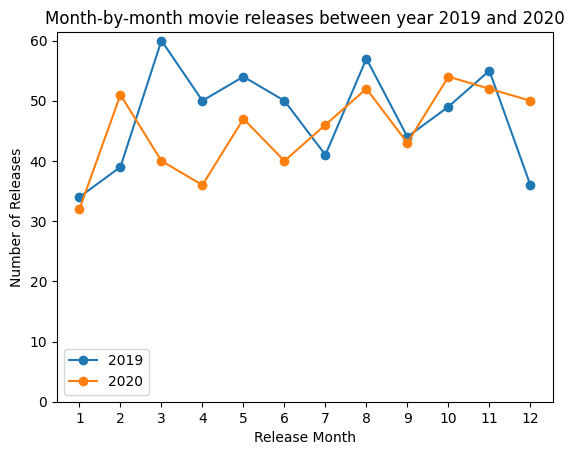

In [111]:
from matplotlib import pyplot

# compare the number of movies released month-by-month between 2019 and 2020 (i.e. before and after pandemic)
movies_from_2019 = metacritic_df[metacritic_df["year"] == 2019]
movies_from_2020 = metacritic_df[metacritic_df["year"] == 2020]

releases_by_month_2019 = movies_from_2019[["month", "title"]].groupby("month", as_index=False)["title"].count()
releases_by_month_2020 = movies_from_2020[["month", "title"]].groupby("month", as_index=False)["title"].count()

releases_by_month_2019.head()

months = list(range(1, 13))

pyplot.title("Month-by-month movie releases between year 2019 and 2020")
pyplot.xlabel("Release Month")
pyplot.ylabel("Number of Releases")
pyplot.xticks(months)
pyplot.plot(releases_by_month_2019.month, releases_by_month_2019.title, "-o", label="2019")
pyplot.plot(releases_by_month_2020.month, releases_by_month_2020.title, "-o", label="2020")
pyplot.ylim([0, None])
pyplot.legend()
pyplot.show()





Comparing the number of movies released each month between 2019 and 2020, we can see between March 2020 and June 2020, there were significantly fewer movies released. There was no surprise because that was when the pandemic started and there was lockdown, and many businesses were closed.

But the interesting thing is in December 2020, the number of movie releases was significantly more than that from December 2019. Now I want to know which one is closer to normal, so next I will also plot the month-by-month number of movies released averaged from 2000 - 2018.

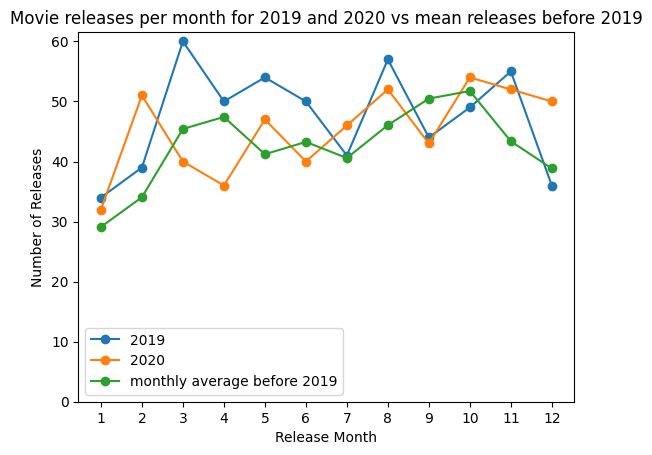

In [112]:
movies_before_2019 = metacritic_df[metacritic_df["year"] < 2019]
releases_by_month_before_2019 = movies_before_2019[["month", "year", "title"]].groupby(["month", "year"], as_index=False)["title"].count()

releases_by_month_before_2019.head()

mean_month_release_before_2019 = releases_by_month_before_2019.groupby(["month"], as_index=False)["title"].mean()

mean_month_release_before_2019.head()

pyplot.title("Movie releases per month for 2019 and 2020 vs mean releases before 2019")
pyplot.xlabel("Release Month")
pyplot.ylabel("Number of Releases")
pyplot.xticks(months)
pyplot.plot(releases_by_month_2019.month, releases_by_month_2019.title, "-o", label="2019")
pyplot.plot(releases_by_month_2020.month, releases_by_month_2020.title, "-o", label="2020")
pyplot.plot(mean_month_release_before_2019.month, mean_month_release_before_2019.title, "-o", label="monthly average before 2019")
pyplot.ylim([0, None])
pyplot.legend()
pyplot.show()



From the graph above, although the entire year of 2019 doesn't match the average from 2000-2018 that closely, we can see for the months of December, the number of releases in 2019 is very close to the average before 2019, and the same data for 2020 is much higher.

I think the reason for that is because in 2020 when the pandemic first hit, many movies postponed their releases towards the end of the year.

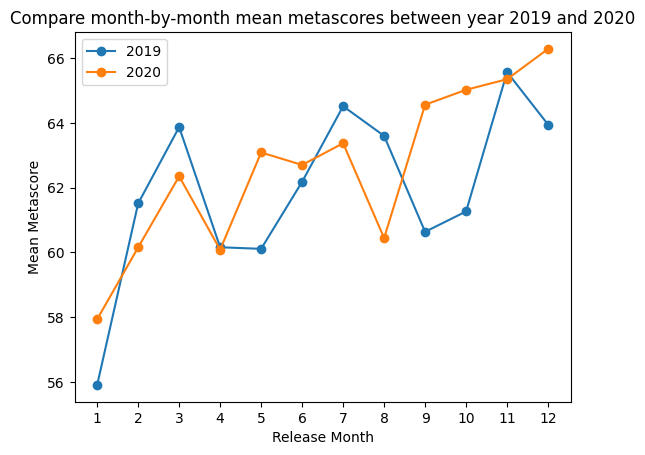

In [113]:
from matplotlib import pyplot

# compare movie average metadata scores month-by-month between 2019 and 2020 (i.e. before and after pandemic)
mean_score_by_month_2019 = movies_from_2019[["month", "metascore"]].groupby("month", as_index=False)["metascore"].mean()
mean_score_by_month_2020 = movies_from_2020[["month", "metascore"]].groupby("month", as_index=False)["metascore"].mean()

pyplot.title("Compare month-by-month mean metascores between year 2019 and 2020")
pyplot.xlabel("Release Month")
pyplot.ylabel("Mean Metascore")
pyplot.xticks(months)
pyplot.plot(mean_score_by_month_2019.month, mean_score_by_month_2019.metascore, "-o", label="2019")
pyplot.plot(mean_score_by_month_2020.month, mean_score_by_month_2020.metascore, "-o", label="2020")
pyplot.legend()
pyplot.show()




From the graph above, we can see that from September to December 2020, the average metascores are significantly higher than these from the same period in 2019. I believe this is also due to the postponing of movie releases in 2020 after the pandemic hit. Studios decided to postpone movie releases, especially when they feel a movie was a good one and didn't want to release it during the early lockdown period, fearing it may not get the expected ticket sales. These movies got released in the last quarter of the year and received good reviews because they were good movies.

In [114]:
import collections as pycol

excluded_list = ["the", "a", "and", "of", "to", "in", "is", "with", "on", "as", "an",
 "for", "their","that", "", "by", "from", "who", "when", "but", "they", "at",
 "has", "into", "this", "new", "are", "one", "it", "after", "be", "story", "two", "out",
 "about", "world", "film", "will", "up", "have", "all", "family", "most", "was"]

description_words = []
for desc in metacritic_df["description"]:
    words = desc.lower().split(" ")
    description_words.extend([w for w in words if w not in excluded_list])

most_common_keywords = pycol.Counter(description_words).most_common(20)

print(most_common_keywords)


[('his', 10873), ('her', 7105), ('he', 4819), ('she', 2906), ('life', 2188), ('young', 1810), ('him', 1387), ('only', 1244), ('through', 1142), ('love', 1111), ('what', 1090), ('find', 1049), ('own', 1020), ('man', 1009), ('between', 965), ('where', 948), ('must', 928), ('while', 914), ('more', 911), ('years', 908)]


I started out trying to find all the unique keywords and their occurrences in movie descriptions. Knowing some of the words like "the", "a" will be the most frequent, I also created an `excluded_list` to filter out these meaningless words.

I count the occurrences of the unique words and list the top 20 most common ones. From the list, I picked out the meaningless articles and propositions words and so forth, put them into the `excluded_list`, and run the logic again to add more to the `excluded_list`. I did this iteratively a few times until the top common words started to have some meanings.

What's interesting is that `his` and `her` were among the most popular, but judging from the occurences, `his` was a lot more common than `her`.  Notice here the word `her` has two meanings, the possessive word and also the objective word, so it is equivalent to `his` + `him`. And if we add the objective `him`, the count for the male countpart is even higher.

So now I am interested in seeing the occurrences of these words (and similar ones such as `man` vs `woman`) occurring in movie descriptions through the years to see if there are any trends.

To make the comparison meaningful, I will combine some of the words together due to a single word taking on different forms/meanings (e.g. `her` is subjective and possessive, whereas `his` is possessive determiner and possessive pronoun). 

| Male term | Female term  |
|---        | ---          |
| he        | she          |
| him + his | her + hers   |
| man + men | woman + women|




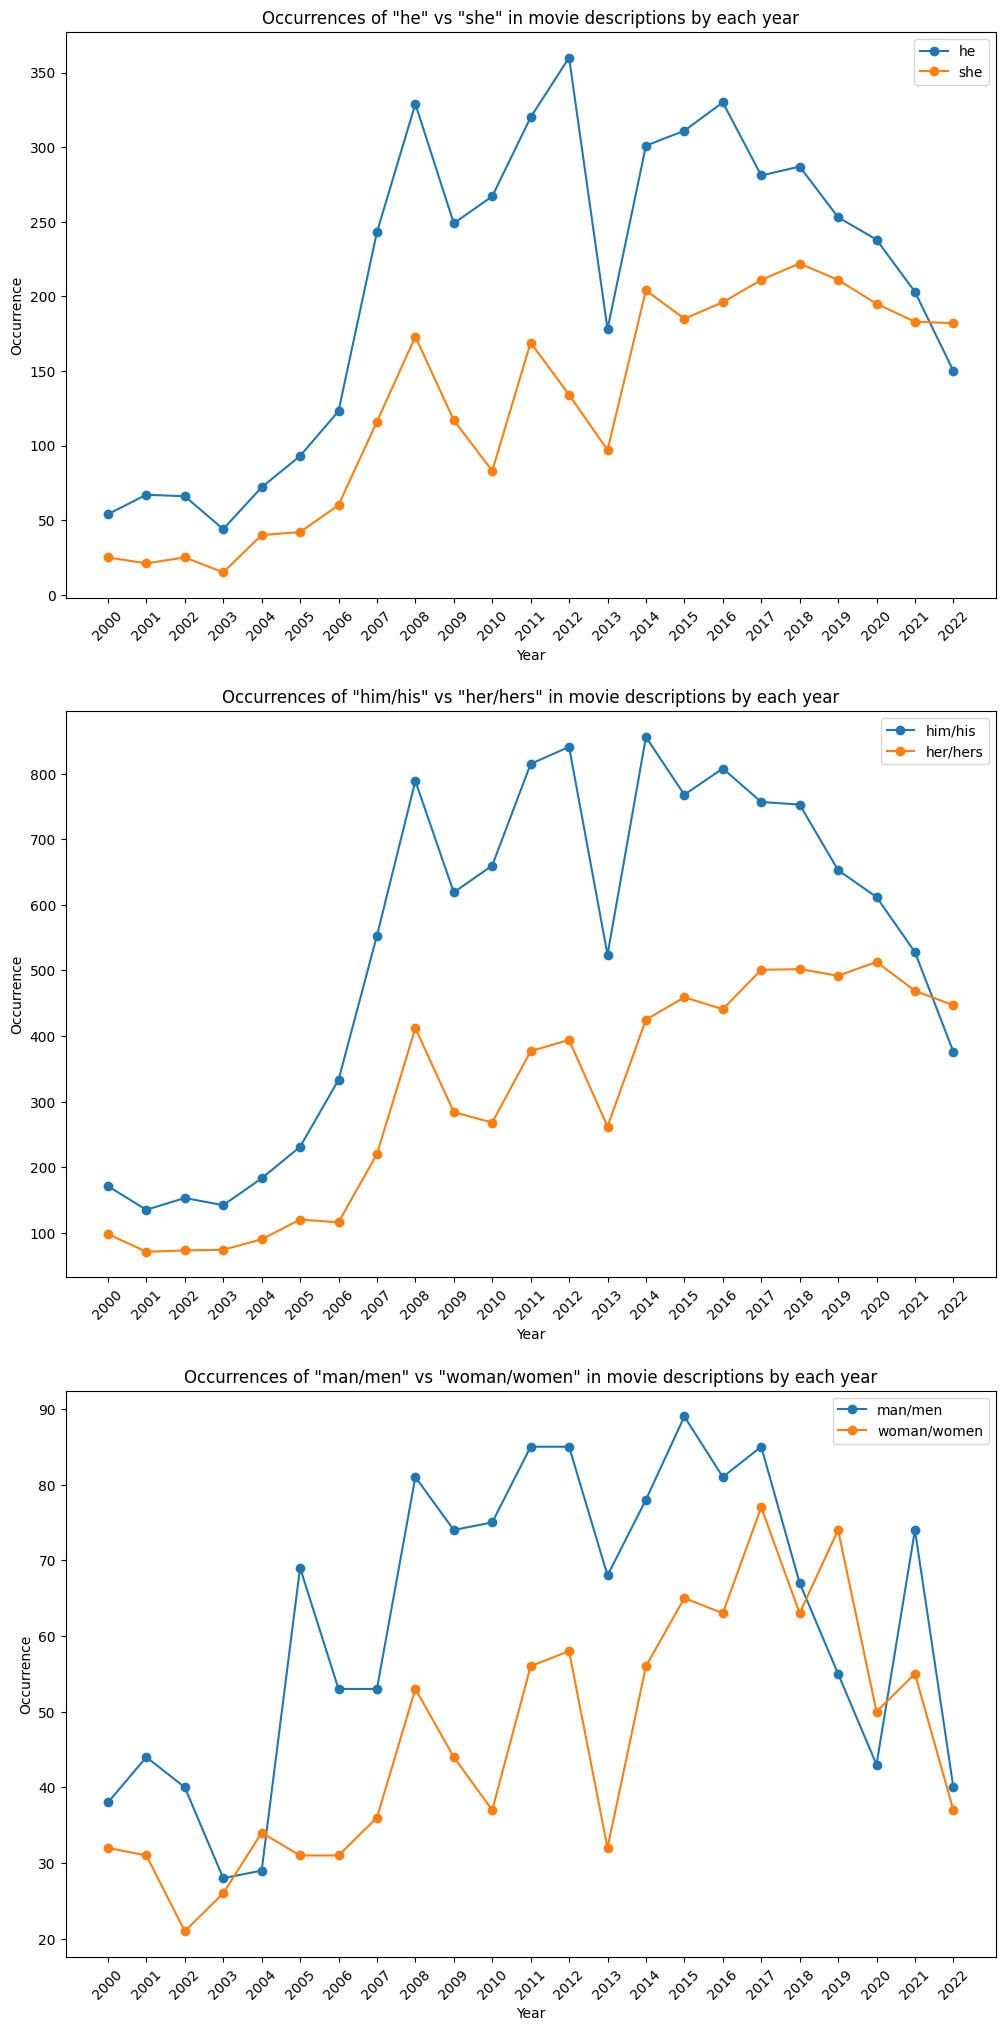

In [115]:
years = range(2000, 2023)
word_count_by_year_df = pd.DataFrame({
    "year": pd.Series(dtype="int"),
    "he": pd.Series(dtype="int"),
    "she": pd.Series(dtype="int"),
    "him_his": pd.Series(dtype="int"),
    "her_hers": pd.Series(dtype="int"),
    "man_men": pd.Series(dtype="int"),
    "woman_women": pd.Series(dtype="int")
})

word_count_by_year_df.head()


for year in years:
    movies_from_that_year = metacritic_df[metacritic_df["year"] == year]
    keywords_that_year = []
    for desc in movies_from_that_year["description"]:
        words = desc.lower().split(" ")
        keywords_that_year.extend(words)

    freq = dict(pycol.Counter(keywords_that_year).most_common())
    word_count_by_year_df = pd.concat(
        [
            word_count_by_year_df,
            pd.DataFrame.from_records(
                [
                    {
                        "year": year,
                        "he": freq.get("he", 0),
                        "she": freq.get("she", 0),
                        "him_his": freq.get("him", 0) + freq.get("his", 0),
                        "her_hers": freq.get("her", 0) + freq.get("hers", 0),
                        "man_men": freq.get("man", 0) + freq.get("men", 0),
                        "woman_women": freq.get("woman", 0) + freq.get("women", 0)   
                    }
                ]
            )
        ]
    )
word_count_by_year_df.head()

def line_plot_ax(ax, word1, word2, df, years):
    display_word1 = word1.replace("_", "/")
    display_word2 = word2.replace("_", "/")

    ax.set_title(f"Occurrences of \"{display_word1}\" vs \"{display_word2}\" in movie descriptions by each year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Occurrence")
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)
    ax.plot(df.year, df[word1], "-o", label=display_word1)
    ax.plot(df.year, df[word2], "-o", label=display_word2)
    ax.legend()


fig, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=(12, 25))
line_plot_ax(ax1, "he", "she", word_count_by_year_df, years)
line_plot_ax(ax2, "him_his", "her_hers", word_count_by_year_df, years)
line_plot_ax(ax3, "man_men", "woman_women", word_count_by_year_df, years)

pyplot.show()


From the graphs above, we can see there is a big gap between the occurrences of male terms and these of female terms. The gap is especially large between the year of 2008 and somewhere around 2014.
I believe that is because in most movies, most of the lead characters are male, and that's why the description of the movie uses a lot of the male terms. But it is also observed that the female terms are in an increase trend, while the male terms are decreasing, starting somewhere around 2014 ~ 2016-ish. And in 2022, for the first time the occurrences of female terms are higher than these of the male terms.  I think this could be our society is become more aware of the gender bias, so there are more movies with female leads than before. Although slowly, the gap is getting smaller.

In this graph, we are using the word occurrences. One problem with that is a word could occurr multiple times in a movie description, and could throw-off the actual trend if a few movies with higher than usual word occurrences. Let's examine some statistics on word occurrences next to see if there are any outliers or some movies giving more weights than the rest

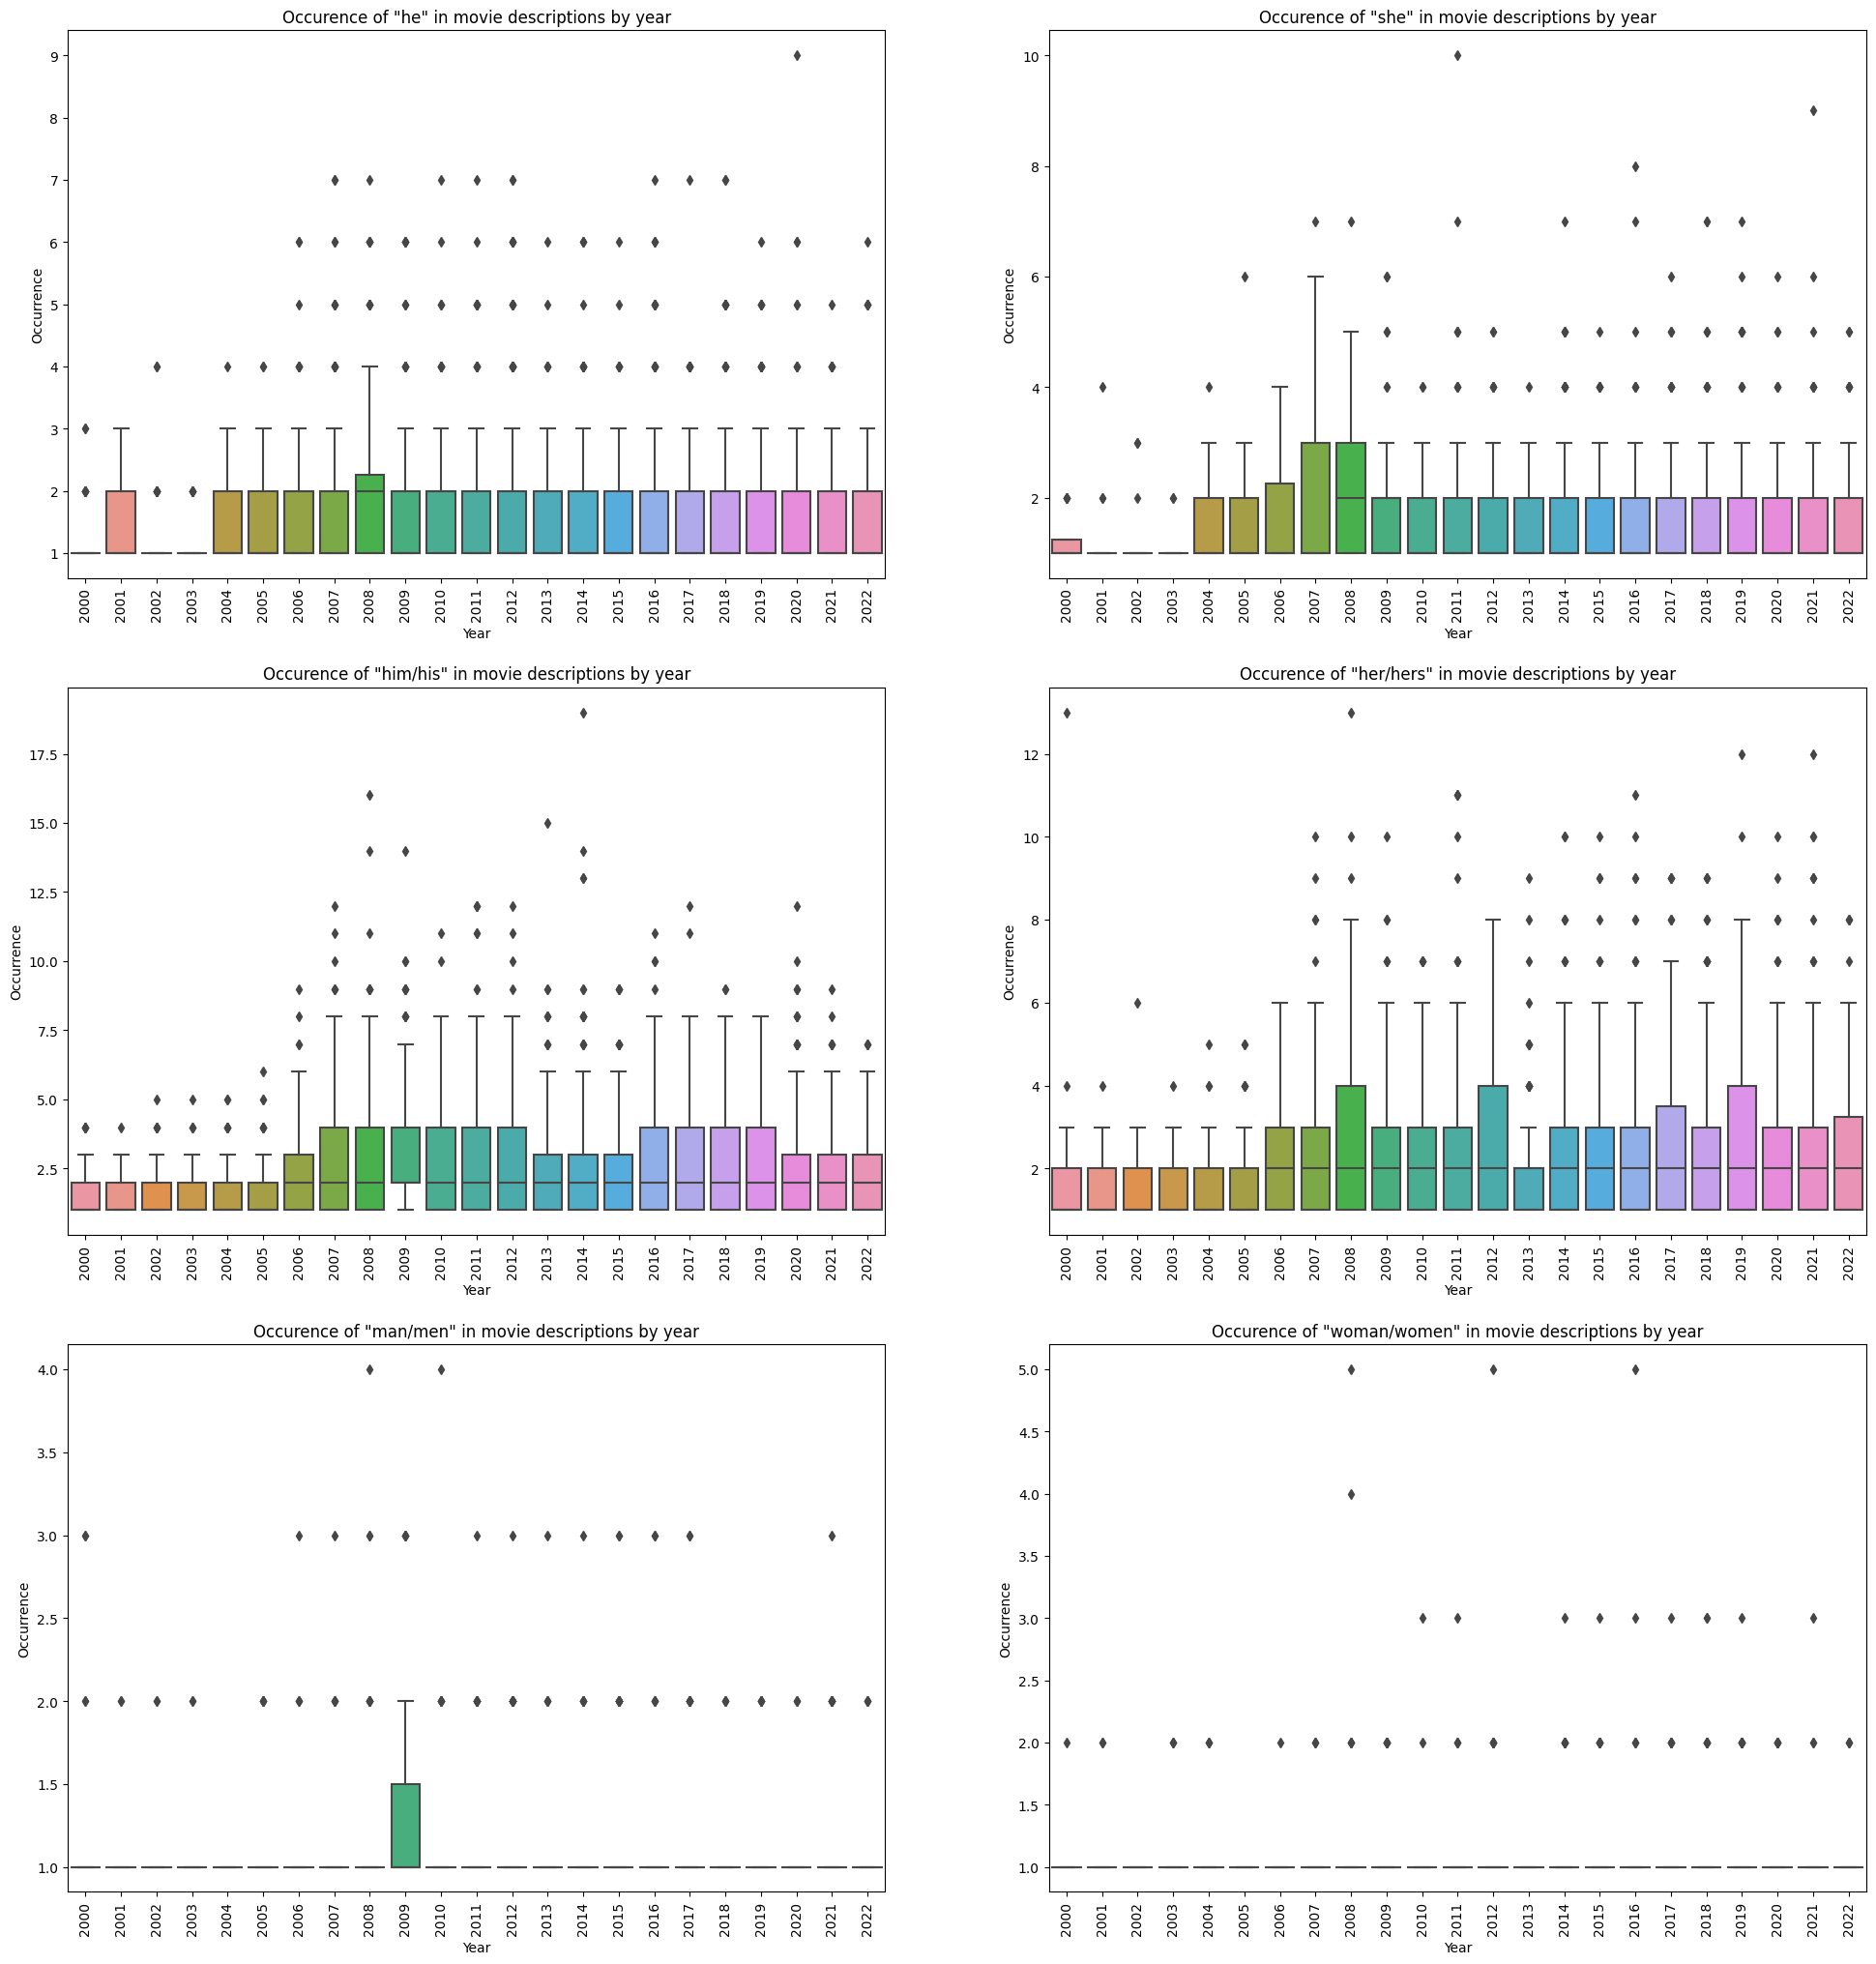

In [116]:
import seaborn

raw_word_count_per_movie_df = pd.DataFrame({
    "title": pd.Series(dtype="str"),
    "year": pd.Series(dtype="int"),
    "he": pd.Series(dtype="int"),
    "she": pd.Series(dtype="int"),
    "him_his": pd.Series(dtype="int"),
    "her_hers": pd.Series(dtype="int"),
    "man_men": pd.Series(dtype="int"),
    "woman_women": pd.Series(dtype="int")
})

for _, row in metacritic_df.iterrows():
    desc = row["description"]
    words = desc.lower().split(" ")
    freq = dict(pycol.Counter(words).most_common())
    raw_word_count_per_movie_df = pd.concat(
        [
            raw_word_count_per_movie_df,
            pd.DataFrame.from_records(
                [
                    {
                        "title": row.title,
                        "year": row.year,
                        "he": freq.get("he", 0),
                        "she": freq.get("she", 0),
                        "him_his": freq.get("him", 0) + freq.get("his", 0),
                        "her_hers": freq.get("her", 0) + freq.get("hers", 0),
                        "man_men": freq.get("man", 0) + freq.get("men", 0),
                        "woman_women": freq.get("woman", 0) + freq.get("women", 0)   
                    }
                ]
            )
        ]
    )

raw_word_count_by_year_and_word = {}

def get_movie_with_word_for_year(df, word, year):
    return df[(df["year"] == year) & (df[word] > 0)]

for year in years:
    movies_with_he_that_year = get_movie_with_word_for_year(raw_word_count_per_movie_df, "he", year)
    movies_with_she_that_year = get_movie_with_word_for_year(raw_word_count_per_movie_df, "she", year)
    movies_with_him_his_that_year = get_movie_with_word_for_year(raw_word_count_per_movie_df, "him_his", year)
    movies_with_her_hers_that_year = get_movie_with_word_for_year(raw_word_count_per_movie_df, "her_hers", year)
    movies_with_man_men_that_year = get_movie_with_word_for_year(raw_word_count_per_movie_df, "man_men", year)
    movies_with_woman_women_that_year = get_movie_with_word_for_year(raw_word_count_per_movie_df, "woman_women", year)
    
    raw_word_count_by_year_and_word[year] = {
        "he": movies_with_he_that_year["he"].tolist(),
        "she": movies_with_she_that_year["she"].tolist(),
        "him_his": movies_with_him_his_that_year["him_his"].tolist(),
        "her_hers": movies_with_her_hers_that_year["her_hers"].tolist(),
        "man_men": movies_with_man_men_that_year["man_men"].tolist(),
        "woman_women": movies_with_woman_women_that_year["woman_women"].tolist(),
    }

movies_with_he_that_year.head()

def boxplot_in_subplot(ax, word, years, raw_word_count):
    display_word = word.replace("_", "/")
    data = []
    for year in years:
        data.append(raw_word_count[year][word])
    ax.set_title(f"Occurence of \"{display_word}\" in movie descriptions by year")
    ax.set_xlabel("Year")
    ax.set_ylabel("Occurrence")
    ax.set_xticks(list(years))
    seaborn.boxplot(data, ax=ax)
    ax.set_xticklabels([str(y) for y in years], rotation=90)


fig, axs = pyplot.subplots(3,2, figsize=(24, 25))

boxplot_in_subplot(axs[0,0], "he", years, raw_word_count_by_year_and_word)
boxplot_in_subplot(axs[0,1], "she", years, raw_word_count_by_year_and_word)
boxplot_in_subplot(axs[1,0], "him_his", years, raw_word_count_by_year_and_word)
boxplot_in_subplot(axs[1,1], "her_hers", years, raw_word_count_by_year_and_word)
boxplot_in_subplot(axs[2,0], "man_men", years, raw_word_count_by_year_and_word)
boxplot_in_subplot(axs[2,1], "woman_women", years, raw_word_count_by_year_and_word)        

pyplot.show()

From the boxplot above, we can see each year, the distribution of these words in movie descriptions. There are a lot of "fliers" at the upper bound, because some movies have the words repeated many times in its description. This means using word occurrence count may not give the accurate picture as movies with repeated words are given more weight and therefore falsely inflates the count. So next, let's check the movie count instead, which means if a word shows up in a movie description, it is only counted as 1 occurrence, regardless how many times that word is repeated in the movie.

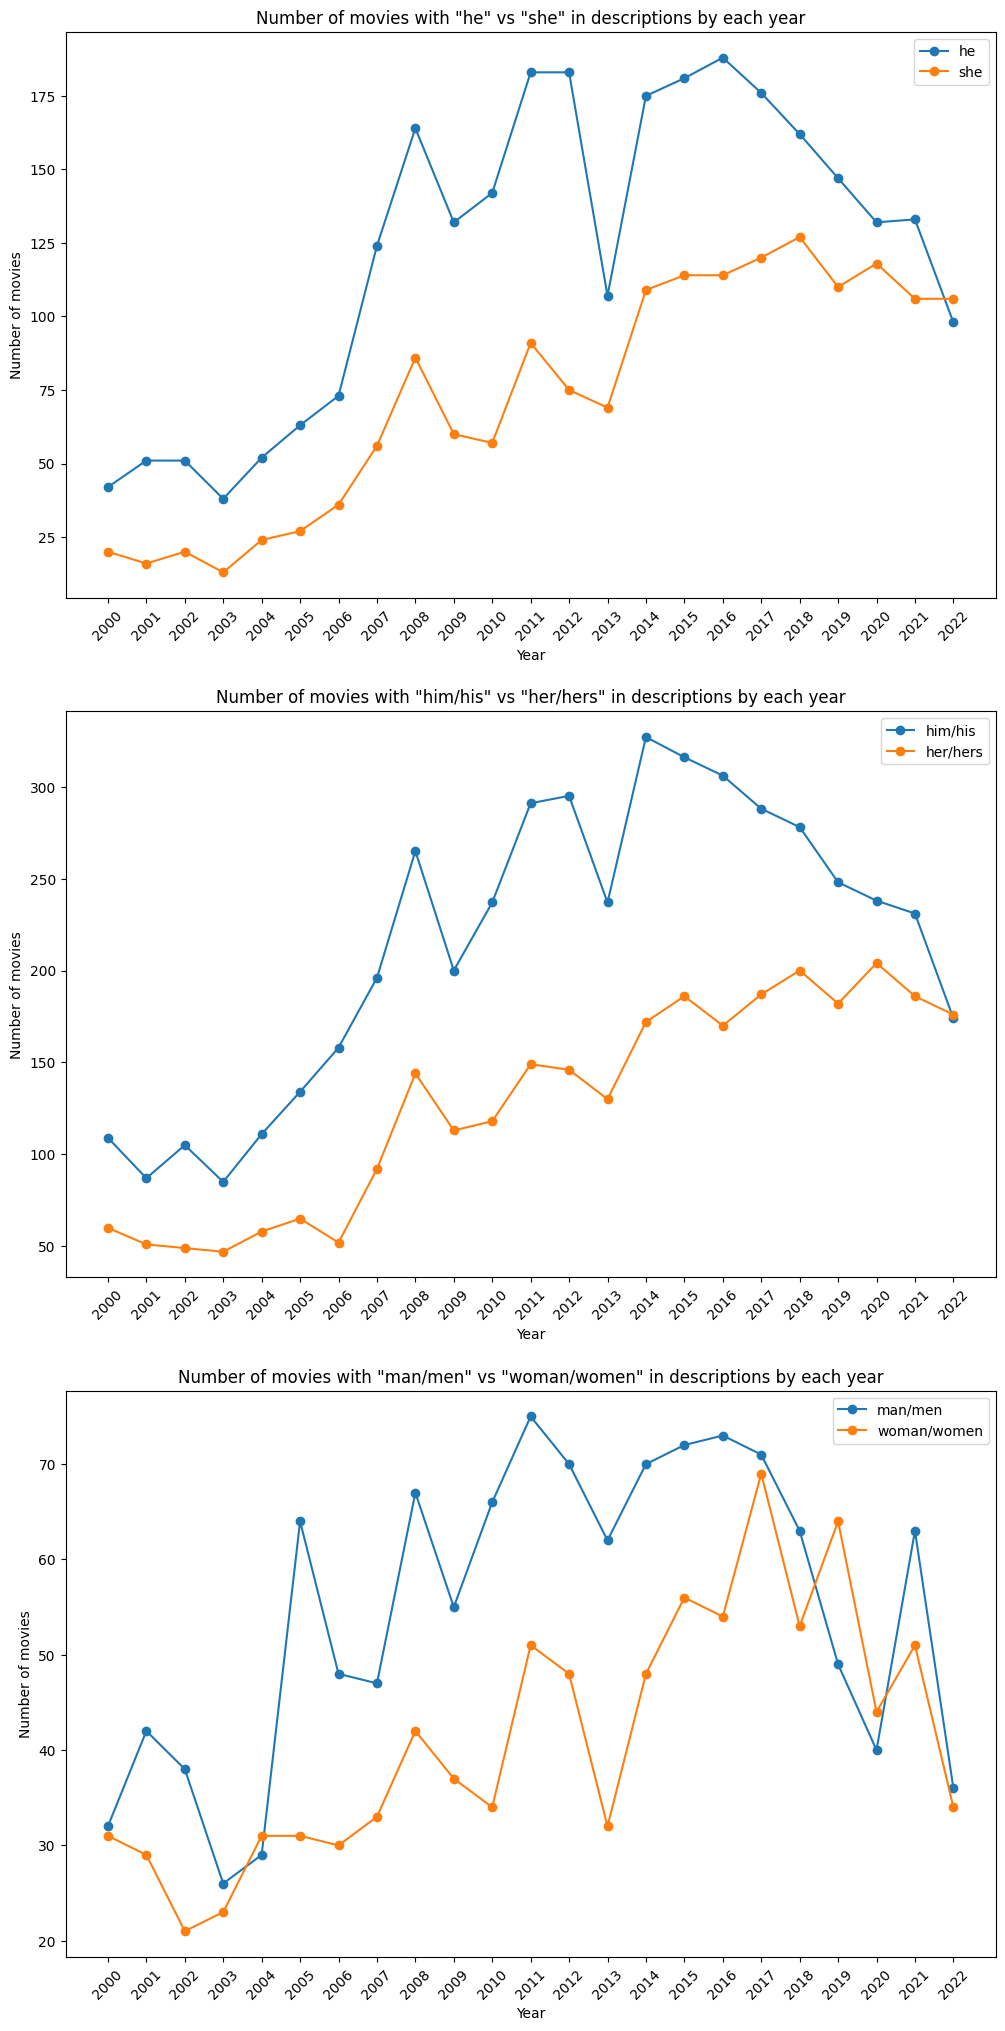

In [117]:
per_movie_word_count_df = pd.DataFrame({
    "year": pd.Series(dtype="int"),
    "he": pd.Series(dtype="int"),
    "she": pd.Series(dtype="int"),
    "him_his": pd.Series(dtype="int"),
    "her_hers": pd.Series(dtype="int"),
    "man_men": pd.Series(dtype="int"),
    "woman_women": pd.Series(dtype="int")
})

for _, row in metacritic_df.iterrows():
    desc = row["description"]
    words = set(desc.lower().split(" "))
    per_movie_word_count_df = pd.concat(
        [
            per_movie_word_count_df,
            pd.DataFrame.from_records(
                [
                    {
                        "year": row.year,
                        "he": 1 if "he" in words else 0,
                        "she": 1 if "she" in words else 0,
                        "him_his": 1 if "him" in words or "his" in words else 0,
                        "her_hers": 1 if "her" in words or "hers" in words else 0,
                        "man_men": 1 if "man" in words or "men" in words else 0,
                        "woman_women": 1 if "woman" in words or "women" in words else 0
                    }
                ]
            )
        ]
    )

aggregate_df = per_movie_word_count_df.groupby("year", as_index=False).sum()
aggregate_df.head()

_, (ax1, ax2, ax3) = pyplot.subplots(3, 1, figsize=(12, 25))
line_plot_ax(ax1, "he", "she", aggregate_df, years)
ax1.set_title('Number of movies with "he" vs "she" in descriptions by each year')
ax1.set_ylabel("Number of movies")

line_plot_ax(ax2, "him_his", "her_hers", aggregate_df, years)
ax2.set_title('Number of movies with "him/his" vs "her/hers" in descriptions by each year')
ax2.set_ylabel("Number of movies")

line_plot_ax(ax3, "man_men", "woman_women", aggregate_df, years)
ax3.set_title('Number of movies with "man/men" vs "woman/women" in descriptions by each year')
ax3.set_ylabel("Number of movies")

pyplot.show()

From the graphs above, we are seeing the number of movies with these words in descriptions each year. The graphs show a trend very similar to the word occurrence graphs:

* There are more movies with male terms than these with female terms
* The gap became larger starting in 2007
* Sometime between 2014 ~ 2016, the gap is slowly closing
* The number of movies with female terms in description has been increasing
* In 2022 so far, the number of movies with female terms is just very slightly bigger than that with male terms.

These graphs give us more confidence about the trend. The counts are still not unique in this analysis because if different words occur in a movie's description, that movie will be counted as 1 for all these words. But this is okay because we are showing how many movies have these words, instead of how many words are showing in movie descriptions. If a movie description contains both a male term and a female term, that likely implies the movie has a male lead and a female lead; whereas if a male term repeats X times in a movie description and a female term repeats Y times in the description, it doesn't mean the movie has X number of male leads and Y number of female leads. So this data is more accurate and convincing.
